# COGS 118A - Project Checkpoint

# Names

- Kyle Nakai
- Yueshan Huang
- Shaoming Chen

# Abstract 
In today’s competitive job market, estimating future salary is a crucial aspect for both college students and education institutions. By machine learning techniques, our goal is to develop a predictive model that could estimate the salary of college graduates based on their academic achievements. We used a kaggle dataset that showed various features that reflect their performance in college, such as GPA, degree, or AMCAT scores. Most features are measured numerically, for those who are not in numeric form such as degree or gender, we will use one hot encoding method. With this data, we will identify the top 10 most significant features that contribute to the salary and we will use linear regression to train the data sets. Our model's performance will be masured based on MSE (Mean Squared Error).

# Background

College students' salaries are influenced by various factors, including gender, college rank, major choice, and standardized test scores such as the AMCAT. Understanding the relationship between these factors and salary outcomes is crucial for informed decision-making and addressing potential disparities.

Gender plays<a name="hess"></a>[<sup>[1]</sup>](#hessnote) a significant role in salary discrepancies among college graduates. Despite advancements in gender equality, women often face lower wages compared to men. Analyzing salary data can provide insights into the extent of these disparities, helping policymakers develop strategies to promote pay equity and fair employment practices.

The prestige of the college<a name="pic"></a>[<sup>[2]</sup>](#picnote) attended also impacts salary prospects. Higher-ranked colleges often offer better resources, networking opportunities, and career services, which can translate into higher starting salaries. Exploring the connection between college rank and salaries can inform educational institutions about the value of enhancing career support for students and strengthening alumni networks.
The choice of major is another influential factor. Certain fields, such as STEM (Science, Technology, Engineering, and Mathematics) disciplines, typically yield higher-paying job opportunities. Evaluating the correlation between major choice and salary outcomes can guide students in making informed educational and career decisions while enabling educators to identify areas for curriculum enhancement and support in fields with lower earning potentials.

Additionally, standardized tests like the AMCAT score can impact salary prospects. The AMCAT measures job applicants' aptitude and skills, serving as a benchmark for employability. Analyzing the relationship between AMCAT scores and salaries can help students understand the potential significance of test performance on future earnings.

Machine learning techniques<a name="Mar"></a>[<sup>[3]</sup>](#Marnote) can effectively analyze relevant datasets to derive valuable insights. Predictive modeling can forecast salary outcomes based on factors such as gender, college rank, major, and AMCAT scores. Feature importance analysis can identify the relative significance of these factors in salary determination. Machine learning algorithms can also be employed for clustering and segmentation, helping identify patterns and target specific groups for interventions. By leveraging machine learning, policymakers and educators can gain actionable information to promote fair salary practices, address disparities, and support informed decision-making for college students.

# Problem Statement

In this project, we aim to address a research problem related to predicting the salary of recently graduated engineers. Our research question revolves around investigating the predictability of salary using various data variables, including college GPA, gender, college tier, 12th-grade marks, and potentially other relevant factors. By employing a linear regression model, our objective is to develop a model that can accurately estimate the salary of individuals as the output based on these factors.

 The variables involved in the study, such as college GPA, gender, college tier, and 12th-grade marks, have been appropriately defined, providing a solid foundation for the analysis.  Furthermore, the potential replicability of the research problem is addressed by employing a linear regression model, which is a well-established and widely used technique in statistical analysis, and the k-fold cross-validation method can be used in different datasets with similar column variables. The use of multiple validation sets proves the reliability of the machine learning method.

# Data

- Dataset: https://www.kaggle.com/datasets/manishkc06/engineering-graduate-salary-prediction?resource=download 
- 2998 observations and 34 variables
- Variables:
    - ID: A unique ID to identify a candidate
    - Salary: Annual CTC offered to the candidate (in INR)
    - Gender: Candidate's gender
    - DOB: Date of birth of the candidate
    - 10percentage: Overall marks obtained in grade 10 examinations
    - 10board: The school board whose curriculum the candidate followed in grade 10
    - 12graduation: Year of graduation - senior year high school
    - 12percentage: Overall marks obtained in grade 12 examinations
    - 12board: The school board whose curriculum the candidate followed
    - CollegeID: Unique ID identifying the university/college which the candidate attended for her/his undergraduate
    - CollegeTier: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the - students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2.
    - Degree: Degree obtained/pursued by the candidate
    - Specialization: Specialization pursued by the candidate
    - CollegeGPA: Aggregate GPA at graduation
    - CollegeCityID: A unique ID to identify the city in which the college is located in.
    - CollegeCityTier: The tier of the city in which the college is located in. This is annotated based on the population of the cities.
    - CollegeState: Name of the state in which the college is located
    - GraduationYear: Year of graduation (Bachelor's degree)
    - English: Scores in AMCAT English section
    - Logical: Score in AMCAT Logical ability section
    - Quant: Score in AMCAT's Quantitative ability section
    - Domain: Scores in AMCAT's domain module
    - ComputerProgramming: Score in AMCAT's Computer programming section
    - ElectronicsAndSemicon: Score in AMCAT's Electronics & Semiconductor Engineering section
    - ComputerScience: Score in AMCAT's Computer Science section
    - MechanicalEngg: Score in AMCAT's Mechanical Engineering section
    - ElectricalEngg: Score in AMCAT's Electrical Engineering section
    - TelecomEngg: Score in AMCAT's Telecommunication Engineering section
    - CivilEngg: Score in AMCAT's Civil Engineering section
    - conscientiousness: Scores in one of the sections of AMCAT's personality test
    - agreeableness: Scores in one of the sections of AMCAT's personality test
    - extraversion: Scores in one of the sections of AMCAT's personality test
    - nueroticism: Scores in one of the sections of AMCAT's personality test
    - openess_to_experience: Scores in one of the sections of AMCAT's personality test

- We are particularly interested in the score variables such as CollegeGPA and 12percentage which are represented as floats
- We will need to clean some of the data in the following ways:
    - Convert categorical variables to one-hot encoding
    - Normalize the numerical values for accurate comparison

## Data Cleaning

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

In [15]:
raw = pd.read_csv("Engineering_graduate_salary.csv")
raw.dropna(inplace=True)
raw.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [16]:
raw = raw.drop(['ID', 'DOB','10board', '12graduation', '12board','CollegeID','CollegeTier','CollegeCityID','CollegeCityTier','CollegeState','GraduationYear'], axis = 1)
raw = raw.rename(columns={"10percentage": "grade_10_score", "12percentage": "grade_12_score"})

In [17]:
raw.describe()

,grade_10_score,grade_12_score,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,77.666264,74.341061,71.509857,501.066378,500.431621,514.137759,0.508458,351.868579,96.228152,94.147098,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,10.002785,11.120299,8.122462,105.304512,87.299850,122.194955,0.463373,204.526227,158.737747,177.784536,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,43.000000,40.000000,6.630000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,71.140000,66.000000,66.530000,425.000000,441.250000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,78.965000,74.000000,71.800000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,85.600000,82.600000,76.300000,570.000000,565.000000,595.000000,0.835612,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,97.760000,98.700000,99.930000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,715.000000,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


In [18]:
raw.dtypes

Gender                    object
grade_10_score           float64
grade_12_score           float64
Degree                    object
Specialization            object
collegeGPA               float64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
MechanicalEngg             int64
ElectricalEngg             int64
TelecomEngg                int64
CivilEngg                  int64
conscientiousness        float64
agreeableness            float64
extraversion             float64
nueroticism              float64
openess_to_experience    float64
Salary                     int64
dtype: object

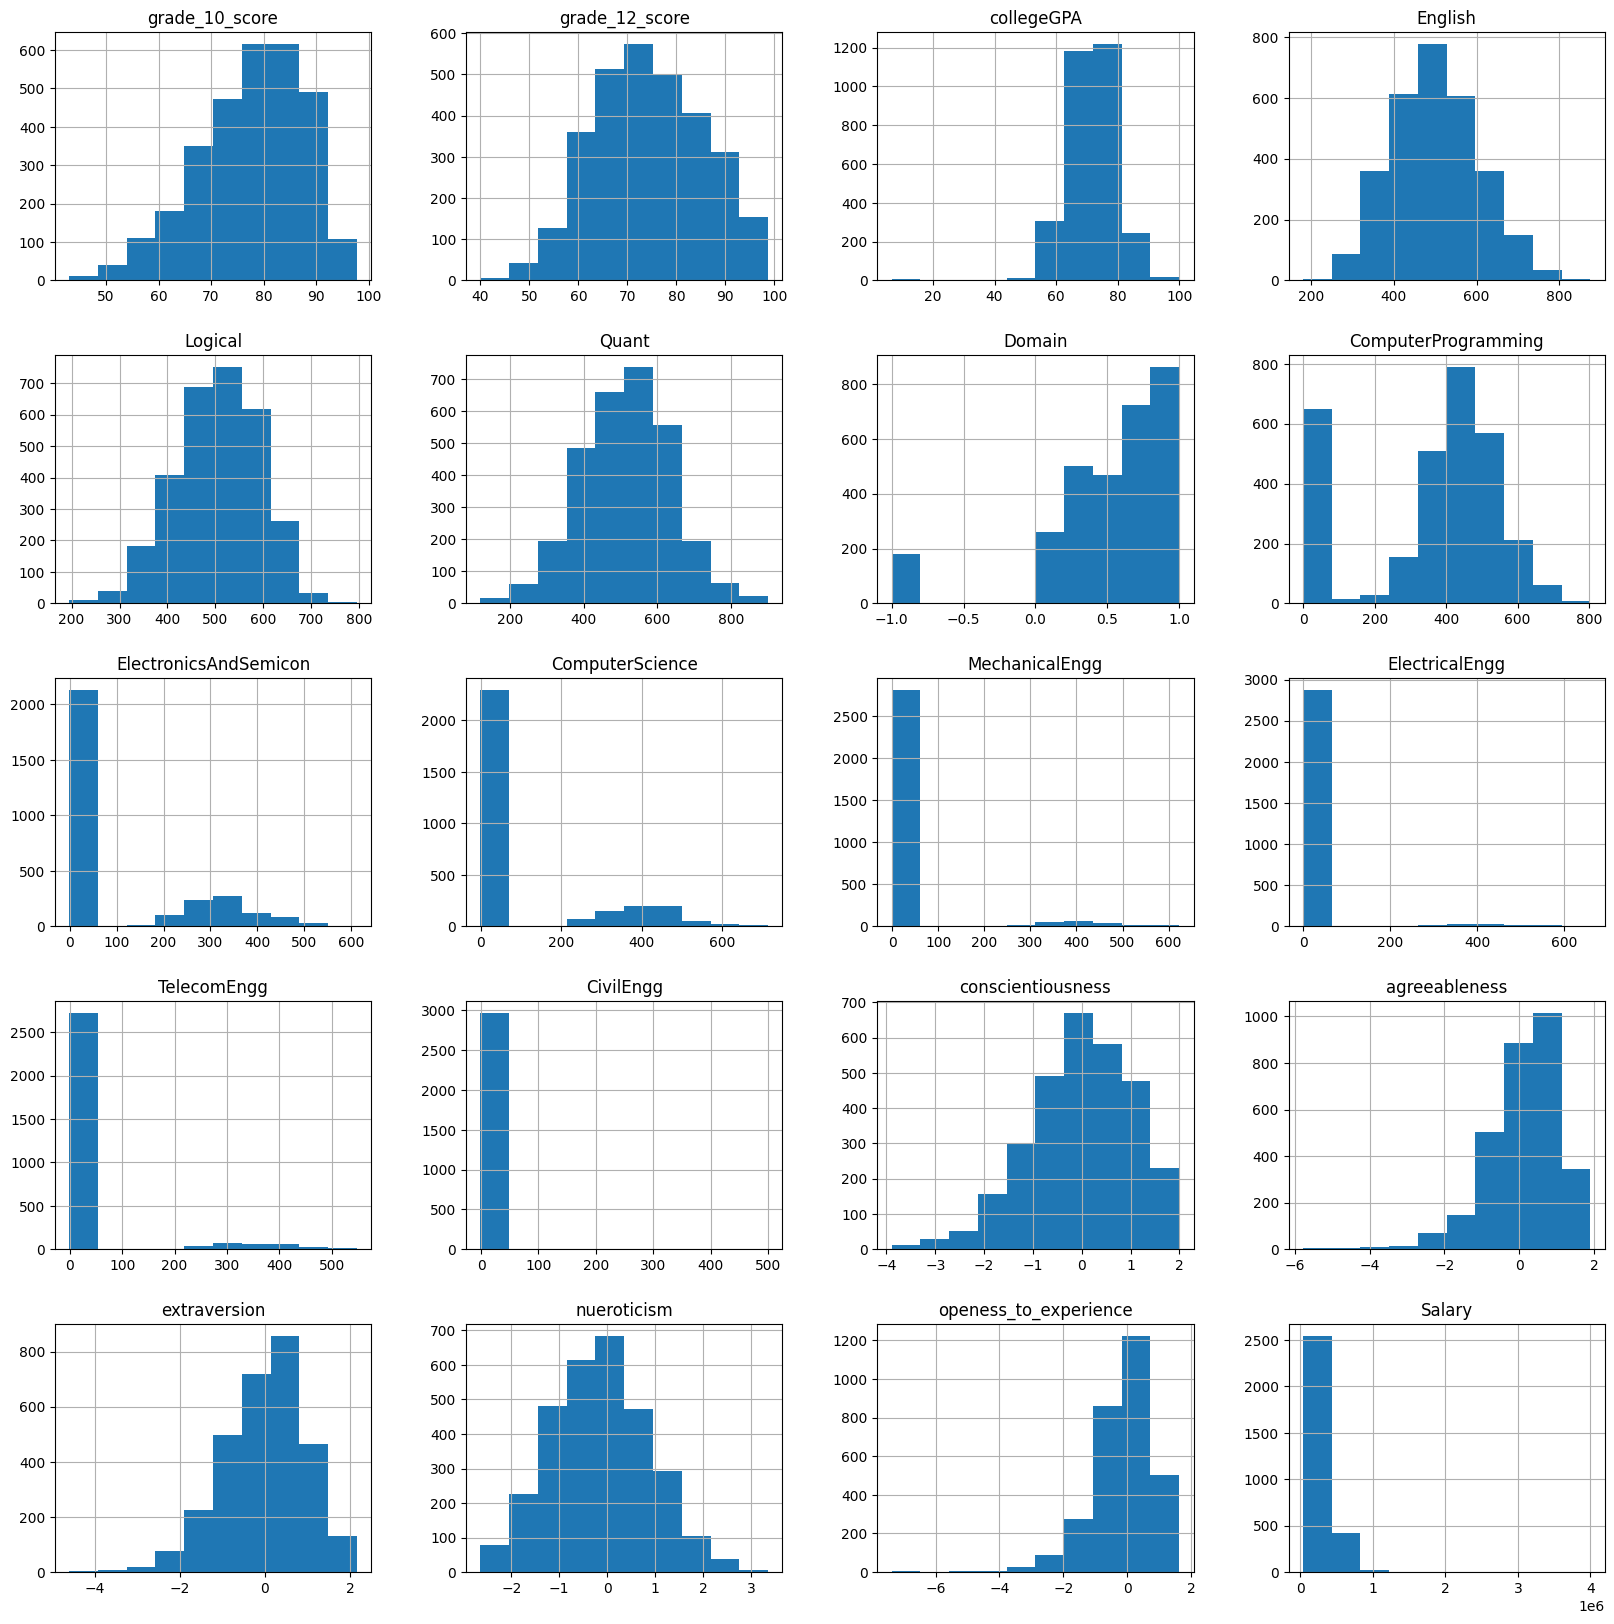

In [19]:
raw[[col for col in raw.columns if col != ('Gender' or 'Degree' or 'Specialization')]].hist(figsize=(20,20))
plt.show()

In [20]:
raw.describe()

,grade_10_score,grade_12_score,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,77.666264,74.341061,71.509857,501.066378,500.431621,514.137759,0.508458,351.868579,96.228152,94.147098,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,10.002785,11.120299,8.122462,105.304512,87.299850,122.194955,0.463373,204.526227,158.737747,177.784536,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,43.000000,40.000000,6.630000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,71.140000,66.000000,66.530000,425.000000,441.250000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,78.965000,74.000000,71.800000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,85.600000,82.600000,76.300000,570.000000,565.000000,595.000000,0.835612,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,97.760000,98.700000,99.930000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,715.000000,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


In [21]:
raw = raw.drop(['CivilEngg', 'TelecomEngg','ElectricalEngg', 'MechanicalEngg', 'ComputerScience','ElectronicsAndSemicon'], axis = 1)
raw.head()

,Gender,grade_10_score,grade_12_score,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,0.694479,485,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,0.342315,365,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,0.824666,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,0.990009,655,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,B.Tech/B.E.,biotechnology,64.30,575,495,365,0.278457,315,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


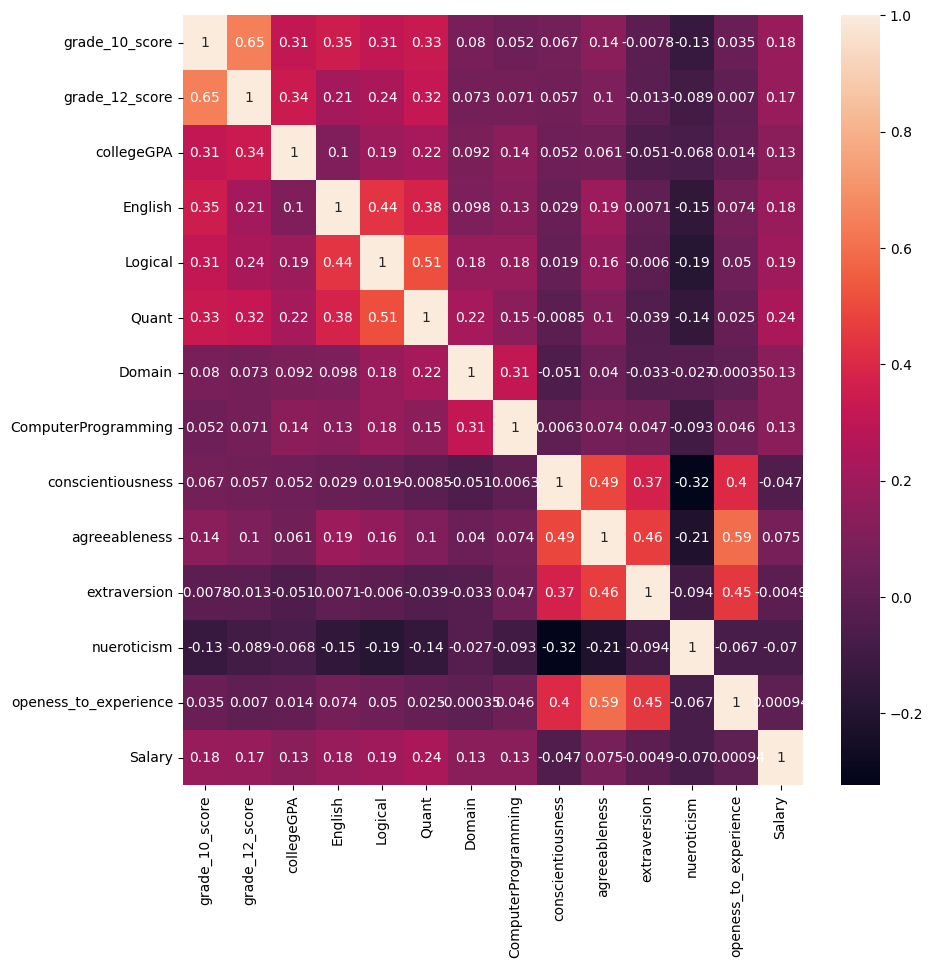

In [22]:
plt.figure(figsize=(10, 10))
sns.heatmap(raw.drop(['Degree', 'Gender', 'Specialization'], axis=1).corr(), annot=True)
plt.show()

In [23]:
raw['Specialization'].value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

In [24]:
def Standardize_Specialization(string):
    
    string = string.lower()
    string = string.strip()
    
    if 'electronics' == string:
        output = 'electronics and communication engineering'
    elif 'information science' == string:
        output = 'information technology'
    elif 'information & communication technology' == string:
        output = 'information technology'
    elif 'embedded systems technology' == string:
        output = 'information technology'
    elif 'ceramic engineering' == string:
        output = 'other'
    elif 'electrical and power engineering' == string:
        output = 'electrical engineering'
    elif 'industrial & management engineering' == string:
        output = 'other'
    elif 'mechanical & production engineering' == string:
        output = 'mechanical engineering'
    elif 'control and instrumentation engineering' == string:
        output = 'instrumentation and control engineering'
    elif 'computer and communication engineering' == string:
        output = 'computer engineering'
    elif 'computer networking' == string:
        output = 'computer application'
    elif 'industrial engineering' == string:
        output = 'industrial & production engineering'
    elif 'metallurgical engineering' == string:
        output = 'other'
    elif 'biomedical engineering' == string:
        output = 'biotechnology'
    elif 'aeronautical engineering' == string:
        output = 'other'
    elif 'mechatronics' == string:
        output = 'other'
    elif 'instrumentation engineering' == string:
        output = 'electronics & instrumentation eng'
    elif 'electronics and computer engineering' == string:
        output = 'computer engineering'
    elif 'telecommunication engineering' == string:
        output = 'other'
    elif 'omputer science and technology' == string:
        output = 'computer science & engineering'
    elif 'automobile/automotive engineering' == string:
        output = 'other'
    else:
        output = string
    
    return output

In [25]:
raw['Specialization'] = raw['Specialization'].apply(Standardize_Specialization)

In [26]:
raw['Specialization'].value_counts()

electronics and communication engineering      671
computer science & engineering                 557
information technology                         509
computer engineering                           419
computer application                           202
mechanical engineering                         156
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          64
other                                           28
electronics & instrumentation eng               27
instrumentation and control engineering         19
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
biotechnology                                   14
electronics engineering                         13
industrial & production engineering             10
chemical engineering                             7
applied electronics and instrum

In [27]:
raw.dtypes

Gender                    object
grade_10_score           float64
grade_12_score           float64
Degree                    object
Specialization            object
collegeGPA               float64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
conscientiousness        float64
agreeableness            float64
extraversion             float64
nueroticism              float64
openess_to_experience    float64
Salary                     int64
dtype: object

In [28]:
sd = raw.select_dtypes(include=['int','float'])

In [29]:
for col in sd.columns:
    raw[col] = stats.zscore(raw[col])

In [30]:
raw = pd.get_dummies(raw, dtype=int)

In [31]:
df = raw
df.head()

,grade_10_score,grade_12_score,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,...,Specialization_electronics and electrical engineering,Specialization_electronics and instrumentation engineering,Specialization_electronics engineering,Specialization_industrial & production engineering,Specialization_information science engineering,Specialization_information technology,Specialization_instrumentation and control engineering,Specialization_mechanical and automation,Specialization_mechanical engineering,Specialization_other
0,1.013260,0.868731,0.284462,1.414550,1.885408,2.421635,0.401518,0.651034,-0.117375,0.264404,...,0,0,0,0,0,0,1,0,0,0
1,-2.066396,-0.885111,-0.801597,-0.580000,-0.749629,-2.489370,-0.358610,0.064215,1.143941,-0.084042,...,0,0,0,0,0,0,0,0,0,0
2,-0.033623,0.973962,-1.178393,-0.152596,-0.291362,-0.074793,0.682520,-1.725585,0.535434,-0.260986,...,0,0,0,0,0,0,0,0,0,0
3,0.663300,1.048612,1.094696,1.651996,1.369857,0.989259,1.039403,1.482362,-0.397721,0.090181,...,0,0,0,0,0,0,0,0,0,0
4,0.433325,0.059265,-0.887792,0.702211,-0.062228,-1.220694,-0.496443,-0.180293,-1.425138,-0.914035,...,0,0,0,0,0,0,0,0,0,0


# Proposed Solution

Python will be used as the platform for presenting solutions. Meanwhile different libraries should be implemented for the data processing, training and evaluating the dataset, such includes scikit-learn, pandas, and numpy

There will be several steps to make the solution to this problem. 

Firstly, raw data is cleaned by some pre-processing steps, including encoding categorical variables, deleting extra columns, handling null values in the dataset, and normalizing outliers and other numerical values. 

Then we choose to use a multi-variable linear regression model to predict the outcome of the students. The reason we use linear regression instead of logistic regression is that the desired outcome is a numerical value instead of a binary variable. The goal is to derive an expression for the salary with given input factors labelled in the columns. Also since our data includes more than one columns, the output value is not a one-to-one relationship. Therefore, we need a multivariable expression for our training model.
Apart from the traditional linear regression model, we also chose to use SVM for our algorithem. There are several resons to that. SVM is a linear regression model that can be fit to our data manipulation and also it is compatible for multivariable complex problem. Besides, it is robust against overfitting and outliers that would give the optimal decision boundary that generalizes well to unseen data. And it is friendly and effecient to small datasets. 

Finally, we choose to use k-fold cross validation to train the model. The reason we choose this method is to effectively shuffle our data and maximizes the utilization of available data as our dataset is not huge. Cross-validation also provides a more robust estimate of a model's performance compared to a single train-test split. By averaging the results from multiple iterations, it reduces the impact of the specific data points in a single split on the performance metrics, leading to a more representative estimate.

# Evaluation Metrics


In our problem, one reasonable evaluation metric to use would be MSE (Mean Squared Error). MSE is considered a rather common metric for evaluating the performance of a regression model. This model measures the average squared difference between the predicted values of the model and the actual values from the dataset. Here is a mathematical representatin of the MSE: MSE = (1/n) * Σ(yi - ŷi)^2. N is the number of data points in total; yi refers to the actual value of the variable for the i-th data point, and ŷi refers to the predicted value of the variable for the i-th data point.

Since the MSE is always greater than zero, a lower MSE indicates a better performance for the model, as the predicted value is closer to the real value in the dataset. It provides a measure of how well the model fits the data and how close the predicted values are to the actual values. However, since MSE is squared, it penalizes larger errors more heavily than smaller errors.

Morever, k-folds cross validation can be used along with MSE. By shuffling the training data and evaluated k-times, overfitting and accuracy of the model can be trained at best. The MSE values in our cross-validation can be averaged to provide an overall assessment of the model's performance.

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

df.columns
df.head()

,grade_10_score,grade_12_score,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,...,Specialization_electronics and electrical engineering,Specialization_electronics and instrumentation engineering,Specialization_electronics engineering,Specialization_industrial & production engineering,Specialization_information science engineering,Specialization_information technology,Specialization_instrumentation and control engineering,Specialization_mechanical and automation,Specialization_mechanical engineering,Specialization_other
0,1.013260,0.868731,0.284462,1.414550,1.885408,2.421635,0.401518,0.651034,-0.117375,0.264404,...,0,0,0,0,0,0,1,0,0,0
1,-2.066396,-0.885111,-0.801597,-0.580000,-0.749629,-2.489370,-0.358610,0.064215,1.143941,-0.084042,...,0,0,0,0,0,0,0,0,0,0
2,-0.033623,0.973962,-1.178393,-0.152596,-0.291362,-0.074793,0.682520,-1.725585,0.535434,-0.260986,...,0,0,0,0,0,0,0,0,0,0
3,0.663300,1.048612,1.094696,1.651996,1.369857,0.989259,1.039403,1.482362,-0.397721,0.090181,...,0,0,0,0,0,0,0,0,0,0
4,0.433325,0.059265,-0.887792,0.702211,-0.062228,-1.220694,-0.496443,-0.180293,-1.425138,-0.914035,...,0,0,0,0,0,0,0,0,0,0


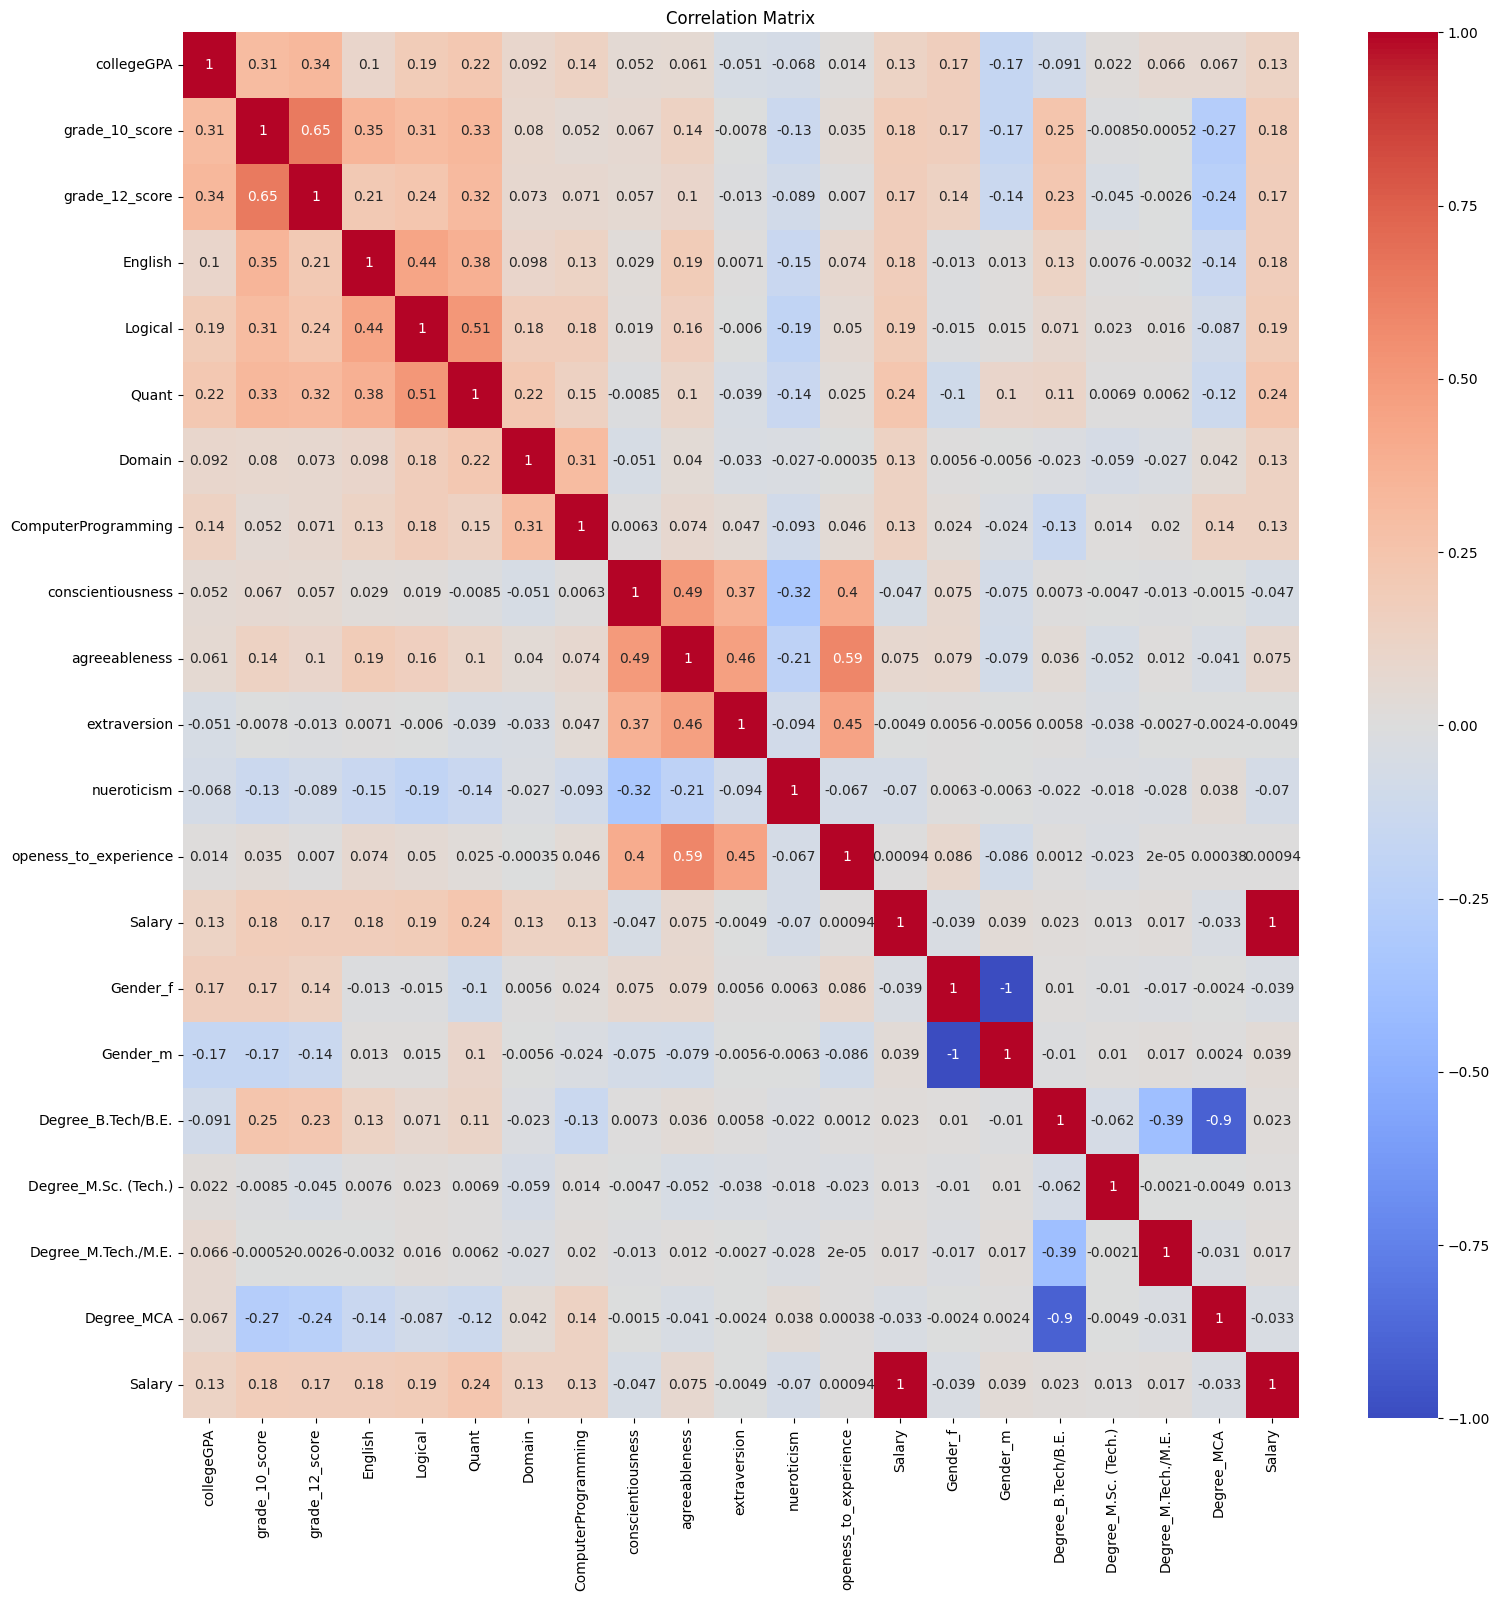

In [33]:
correlation_matrix = df[['collegeGPA', 'grade_10_score', 'grade_12_score', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Salary', 'Gender_f', 'Gender_m', 'Degree_B.Tech/B.E.',
       'Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.', 'Degree_MCA', 'Salary']].corr()
plt.figure(figsize=(18, 18))
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [34]:
X = df[['collegeGPA', 'grade_10_score', 'grade_12_score', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Gender_f', 'Gender_m', 'Degree_B.Tech/B.E.',
       'Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.', 'Degree_MCA']]
y = df[['Salary']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = LinearRegression()

base_model.fit(X_train, y_train)

y_pred_base = base_model.predict(X_test)

mse_base = mean_squared_error(y_test, y_pred_base)

r2_base = r2_score(y_test, y_pred_base)

print('Base Model Performance')
print('Mean Squared Error:', mse_base)
print('R-squared Score:', r2_base)

Base Model Performance
Mean Squared Error: 0.5761006540640303
R-squared Score: 0.12090354021928928


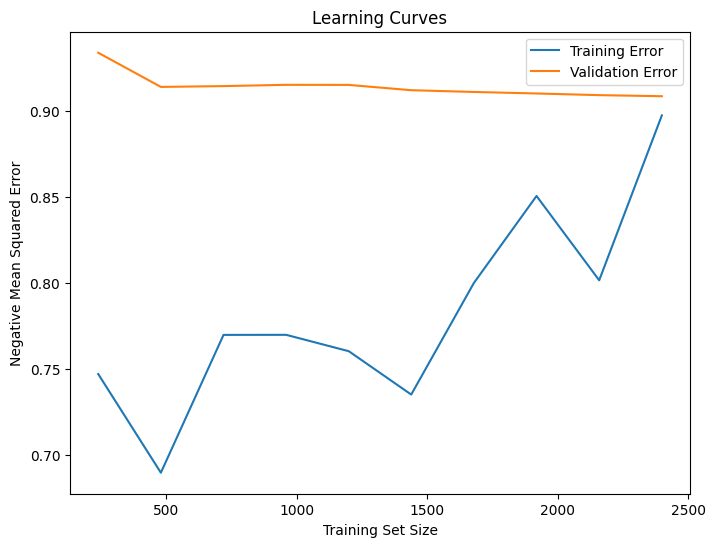

In [35]:
train_sizes, train_scores, test_scores = learning_curve(base_model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, -np.mean(train_scores, axis=1), label='Training Error')
plt.plot(train_sizes, -np.mean(test_scores, axis=1), label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curves')
plt.legend()
plt.show()

In [40]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_reg = SVR()
svm_params = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}
svm_grid = GridSearchCV(svm_reg, svm_params, cv=5, scoring='neg_mean_squared_error')
svm_grid.fit(X_train_scaled, y_train)

best_svm_reg = svm_grid.best_estimator_
best_svm_params = svm_grid.best_params_

y_pred_svm_reg = best_svm_reg.predict(X_test_scaled)
mse_svm_reg = mean_squared_error(y_test, y_pred_svm_reg)
r2_svm_reg = r2_score(y_test, y_pred_svm_reg)

print("Best SVM Model:", best_svm_reg)
print("Best SVM Hyperparameters:", best_svm_params)
print("SVM Mean Squared Error:", mse_svm_reg)
print("SVM R-squared Score:", r2_svm_reg)


c:\Users\YvesSaintBi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\YvesSaintBi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\YvesSaintBi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\YvesSaintBi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\uti

Best SVM Model: SVR(C=1, kernel='linear')
Best SVM Hyperparameters: {'C': 1, 'kernel': 'linear'}
SVM Mean Squared Error: 0.5786207605451807
SVM R-squared Score: 0.11705800269000255


In [45]:
from sklearn.ensemble import GradientBoostingRegressor

# Create an instance of GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators=500)

# Fit the model to the training data
gb_reg.fit(X_train, y_train)

# Evaluate the model on the test data
score = gb_reg.score(X_test, y_test)
print("Model score:", score)

from sklearn.ensemble import RandomForestRegressor

# Create an instance of RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=500)

# Fit the model to the training data
rf_reg.fit(X_train, y_train)

# Evaluate the model on the test data
score = rf_reg.score(X_test, y_test)
print("Model score:", score)

c:\Users\YvesSaintBi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model score: 0.017143436171532134


C:\Users\YvesSaintBi1\AppData\Local\Temp\ipykernel_17100\300696255.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


Model score: 0.06244545877904273


In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, random_state=42)

rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

C:\Users\kylen\AppData\Local\Temp\ipykernel_23448\4255546141.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Mean Squared Error: 0.636700402248049


After our preliminary data analysis we can see that there is some correlation between the independent variables and salary, however it is somewhat weak and we experience a decent amount of error in our predictions. The nature of predicting salary is difficult to achieve precision so we may need to adjust our approach going forward to get a better estimate of salary. There are a number of ways to do this including boosting or using a range of salaries to classify different levels to generalize better. 

# Ethics & Privacy


This dataset is publicly available thanks to 'Aspiring Minds Research', and provides income and educational details about recent graduates from Indian engineering and technology institutions. There are always concerns about privacy and exposure when working with data collected from indiviudals, however in this case our dataset does not contain much personally identifiable information so their is less risk of people being targeted and harmed. The only PII is date of birth but without any other information this is not very valuable. We also do interact with the participants' actual income as well as educational information such as GPA and exam scores. Hopefully the anonymity of the samples will protect the participants in this regard but we must still be cautious when handling data such as this. We must also consider potential biases in the data that could arise from factors such as gender, age, location, and other circumstances. We will deal with potential privacy concerns by ensuring the data is solely used for the purposes outlined by our project. 

# Team Expectations 

* *Respect each other*
* *Finish the work and join meetings on time*
* *Support each other, give help if you can*
* *Check messages on Discord in a timely manner*
* *Be cheerful, positive and encouraging to other team members*

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/17  |  8 PM |  Finish rough draft on project proposal  | finalize the project proposal and make sure to submit on time | 
| 5/24  |  8 PM |  Read the feedback from TA and peers | Discuss on the feedbacks, think of ways to fix the issues, split the work accordingly | 
| 5/29  |  8 PM | Finish individual work split  | Review eachother's work and discuss how to improve further, split the work accordingly |
| 5/31  |  8 PM | Fix the issues and finish rough draft on project check point | finalize the project proposal and make sure to submit on time |
| 6/08   |  8 PM  | Think of ways to improve our project and which part isn't satisfying | Share thoughts and discuss the feasability of each group members ideas, split the work accordingly |
| 6/12  |  8 PM  | Finish individual work split| discuss on how to fix and improve our project |
| 6/14  |  8 PM  | Finish the final project | Turn in Final Project  |

# Footnotes
<a name="hessnote"></a>1.[^](#hess)Hess, A (Jan 20) Survey of 563,000 recent college grads finds gender pay gap already impacting class of 2020 https://www.cnbc.com/2022/01/20/gender-pay-gap-for-class-of-2020-starting-salaries-shown-in-new-report.html. <br>
<a name="picnote"></a>2.[^](#pic)Picchi, A (March 2,2023) Your college major can influence your pay. Here are the best and worst majors. https://www.cbsnews.com/news/college-major-highest-lowest-incomes/ <br>
<a name="Marnote"></a>3.[^](#Mar)Martin, N (July, 2018) Salary Prediction in the IT Job Market with Few High-Dimensional Samples: A Spanish Case Study International Journal of Computational Intelligence Systems, 11(1):1192
